<a href="https://colab.research.google.com/github/Fidaaz2521/PneumoniaScreeningOnMedicalImagingWithCNN_MiniProject5/blob/main/Pneumonia_Screening_CNN_MiniProject5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title:**
# **Pneumonia Screening On Medical Imaging Using CNN ~ DL Approach**



------------------------------------------------

###**Project Type:** EDA + Unsupervised Model + Supervised Models + Neural Networks(DenseNet121 - CNN Model)

**Contribution:** Individual

**Presented By:** Fida Taneem

**Colab Runtime:** GPU

---------------------------------------------

# **Project Summary:**


This project detects pneumonia from chest X-rays using deep learning and machine learning. We applied transfer learning (VGG16, ResNet, DenseNet) for feature extraction, used PCA and KMeans for visualization, and built supervised models (SLP, MLP, fine-tuned CNNs) for classification. Despite limited data and class imbalance, the models achieved ≈95% accuracy with high sensitivity, making the system clinically valuable.

------------------------------------



## **Objective**

1. Extract and analyze features from chest X-ray images using a pre-trained DenseNet121.

2. Explore patterns in X-ray images via PCA and K-Means clustering to identify anomalies.

3. Build and tune supervised classifiers (SLP and MLP) for accurate pneumonia detection.

4. Deliver a reliable AI-based diagnostic tool to support early pneumonia screening.

--------------------------------------

## **Business  Context**

1. Automated pneumonia detection system to assist radiologists in faster diagnosis.

2. Reduces misdiagnosis and supports timely medical intervention.

3. Scalable solution for hospitals and telemedicine platforms.

4. Leverages publicly available Kaggle dataset for reproducible research and training.

----------------------------------------

**Subject:** Medical Image Analysis and CNN-Based Classification

**Data Source:** Chest X-ray dataset (Pneumonia) by Paul Mooney, Kaggle.

--------------------------------

# **Data Overview:**

**Images**: ~5,863 chest X-ray images

**Classes:** 2 (Pneumonia, Normal)

**Image Format:** JPEG, grayscale

**Image Size:** Resized to 128×128 (for CNN input)

**Split:** Training, Validation, Test sets

## **About the Dataset**

    1. image_name – Filename of each chest X-ray image.

    2. patient_id – Identifier for each patient (some patients have multiple X-rays).

    3. class_label – Target variable: Pneumonia or Normal.

    4. dataset_split – Indicates whether the image belongs to train, val, or test set.

    5. image_size – Original dimensions (varied, normalized to 128×128 for modeling).

    6. source – Kaggle dataset by Paul Mooney (https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia).

----------------------------------------------

# **Data Preprocessing & Modeling**

**Dataset:** ~5,863 chest X-ray images (Pneumonia vs Normal) from Kaggle (Paul Mooney).

**Preprocessing:** Resize, normalize, convert to 3 channels, handle duplicates, split into train/val/test.

**Feature Extraction:** DenseNet121 embeddings; optional data augmentation.

**Unsupervised Analysis**: PCA visualization, K-Means clustering to explore feature patterns.

**Supervised Learning:** Single/Multilayer Perceptrons trained on CNN features; evaluated with Accuracy, Precision, Recall, F1, and ROC-AUC.

**Techniques:** Transfer learning, dimensionality reduction, clustering, neural networks, and data augmentation for improved generalization.

--------------------------------------------

# **GitHub Link:**

https://github.com/Fidaaz2521/PneumoniaScreeningOnMedicalImagingWithCNN_MiniProject5


------------------------------------------------

# **Let's Begin!**


# **Setup & environment**
-------
Colab runtime: Runtime -> Change runtime type -> GPU

In [1]:
# Install required packages (run once)
#!pip install -q tensorflow==2.13.0 kagglehub matplotlib scikit-learn opencv-python-headless seaborn tqdm

# **Download dataset via kagglehub**

In [ ]:

import kagglehub
import os


path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
print("Path to dataset files:", path)


DATA_DIR = os.path.join(path, "chest_xray")
assert os.path.exists(DATA_DIR), f"Dataset not found at {DATA_DIR}"
print("Using DATA_DIR:", DATA_DIR)

Using Colab cache for faster access to the 'chest-xray-pneumonia' dataset.
Path to dataset files: /kaggle/input/chest-xray-pneumonia
Using DATA_DIR: /kaggle/input/chest-xray-pneumonia/chest_xray


## **Quick dataset exploration**

In [ ]:

import pathlib


train_dir = pathlib.Path(DATA_DIR) / 'train'
val_dir = pathlib.Path(DATA_DIR) / 'val'
test_dir = pathlib.Path(DATA_DIR) / 'test'


for split in [train_dir, val_dir, test_dir]:
  if split.exists():
    counts = {d.name: len(list((split/d).glob('*.jpeg'))) + len(list((split/d).glob('*.jpg'))) + len(list((split/d).glob('*.png'))) for d in split.iterdir() if d.is_dir()}
    print(f"{split.name} counts: {counts}")
else:
  print(f"Warning: {split} not found")

train counts: {'PNEUMONIA': 3875, 'NORMAL': 1341}
val counts: {'PNEUMONIA': 8, 'NORMAL': 8}
test counts: {'PNEUMONIA': 390, 'NORMAL': 234}


# Exploratory Data Analysis

Pre-Setup(Libraries and dataset Paths)

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import random
from tensorflow.keras.preprocessing import image

# Dataset paths
data_dir = Path(path)  # path returned from kagglehub
train_dir = data_dir / "chest_xray/train"
val_dir   = data_dir / "chest_xray/val"
test_dir  = data_dir / "chest_xray/test"




## **Count images per class**


In [ ]:
def count_images(base_dir):
    counts = {}
    for folder in ["NORMAL", "PNEUMONIA"]:
        counts[folder] = len(os.listdir(base_dir / folder))
    return counts

train_counts = count_images(train_dir)
val_counts   = count_images(val_dir)
test_counts  = count_images(test_dir)

print("Train set:", train_counts)
print("Val set:", val_counts)
print("Test set:", test_counts)



Train set: {'NORMAL': 1341, 'PNEUMONIA': 3875}
Val set: {'NORMAL': 8, 'PNEUMONIA': 8}
Test set: {'NORMAL': 234, 'PNEUMONIA': 390}


1. Gives  an overview of class distribution in each dataset split.

2. Helps check for class imbalance (e.g., Pneumonia >> Normal).

3. Confirms that your dataset has been organized correctly into train/val/test folders.

---------------------------------------

## **Plot class distribution**

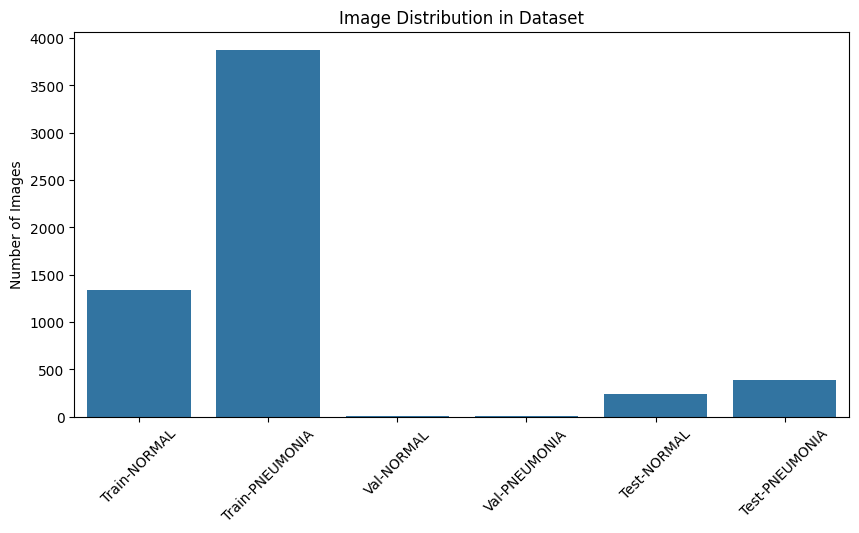

In [ ]:

all_counts = {
    'Train-NORMAL': train_counts['NORMAL'],
    'Train-PNEUMONIA': train_counts['PNEUMONIA'],
    'Val-NORMAL': val_counts['NORMAL'],
    'Val-PNEUMONIA': val_counts['PNEUMONIA'],
    'Test-NORMAL': test_counts['NORMAL'],
    'Test-PNEUMONIA': test_counts['PNEUMONIA']
}

plt.figure(figsize=(10,5))
sns.barplot(x=list(all_counts.keys()), y=list(all_counts.values()))
plt.xticks(rotation=45)
plt.title("Image Distribution in Dataset")
plt.ylabel("Number of Images")
plt.show()



The dataset shows more PNEUMONIA images than NORMAL, indicating class imbalance that could bias the model — requiring techniques like augmentation, resampling, or class weights to ensure fair learning.

-----------------------------------

## **Show random sample images**


Sample NORMAL images (train):


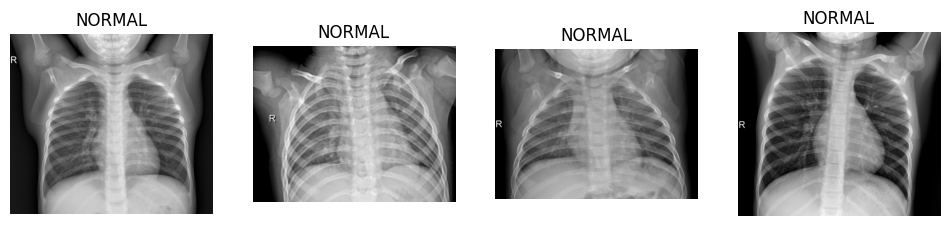

Sample PNEUMONIA images (train):


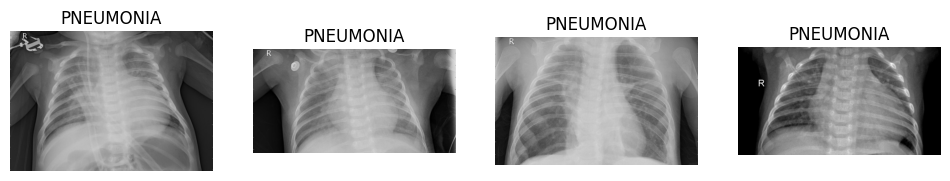

In [ ]:

def show_samples(base_dir, label, n=4):
    folder = base_dir / label
    samples = random.sample(os.listdir(folder), n)
    plt.figure(figsize=(12,6))
    for i, img_name in enumerate(samples):
        img_path = folder / img_name
        img = image.load_img(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(label)
        plt.axis('off')
    plt.show()

print("Sample NORMAL images (train):")
show_samples(train_dir, "NORMAL")

print("Sample PNEUMONIA images (train):")
show_samples(train_dir, "PNEUMONIA")




NORMAL X-rays show clear lungs, while PNEUMONIA X-rays display white opacities — highlighting distinct patterns that CNNs can learn for classification.

------------------------------------------------------------


## **Image size distribution**


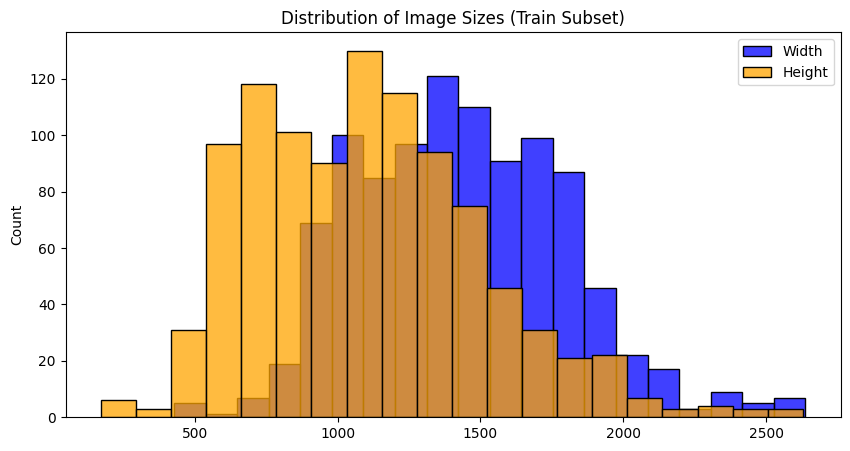

In [ ]:

from PIL import Image

img_shapes = []
for cls in ["NORMAL", "PNEUMONIA"]:
    folder = train_dir / cls
    for img_name in os.listdir(folder)[:500]:  # limit to 500 for speed
        img_path = folder / img_name
        with Image.open(img_path) as im:
            img_shapes.append(im.size)

# Convert to width/height lists
widths, heights = zip(*img_shapes)

plt.figure(figsize=(10,5))
sns.histplot(widths, kde=False, bins=20, color='blue', label='Width')
sns.histplot(heights, kde=False, bins=20, color='orange', label='Height')
plt.legend()
plt.title("Distribution of Image Sizes (Train Subset)")
plt.show()

* The histogram shows that chest X-rays in the dataset come in varying widths and heights, not standardized to one resolution. This variability could affect model training since CNNs require uniform input size.


* The dataset has varying image sizes, so resizing to a fixed resolution (e.g., 128×128 or 224×224) is essential for consistent CNN training.

----------------------------

## **Class Distribution plot of train Dataset**

In [ ]:
import plotly.express as px
import pandas as pd

counts = {
    "NORMAL": len(list((train_dir/'NORMAL').glob('*'))),
    "PNEUMONIA": len(list((train_dir/'PNEUMONIA').glob('*')))
}
df = pd.DataFrame(list(counts.items()), columns=["Class", "Count"])

fig = px.bar(df, x="Class", y="Count", color="Class", title="Class Distribution (Train set)")
fig.show()




The training set is imbalanced, with more PNEUMONIA than NORMAL images, highlighting the need for techniques like augmentation or class weighting.

------------------------------------

## **PCA Projection Of Images (Dimensionality Reduction)**

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def load_sample_images(base_dir, n=200, size=(64,64)):
    X, y = [], []
    for label in ["NORMAL", "PNEUMONIA"]:
        folder = base_dir / label
        files = list(folder.glob('*'))
        samples = random.sample(files, min(n, len(files)))
        for f in samples:
            im = Image.open(f).convert('L').resize(size)
            X.append(np.array(im).flatten())
            y.append(label)
    return np.array(X), np.array(y)

X, y = load_sample_images(train_dir, n=100, size=(64,64))
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

fig = px.scatter(x=X_pca[:,0], y=X_pca[:,1], color=y, title="PCA projection of images")
fig.show()


The PCA scatter plot shows some separation between NORMAL and PNEUMONIA images in 2D feature space, indicating that even simple pixel-based features capture distinguishable patterns.

**Key takeaway:** This suggests that CNNs can effectively learn these patterns for accurate classification.

---------------------------

# **Unsupervised Approach (KMeans Clustering)**

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


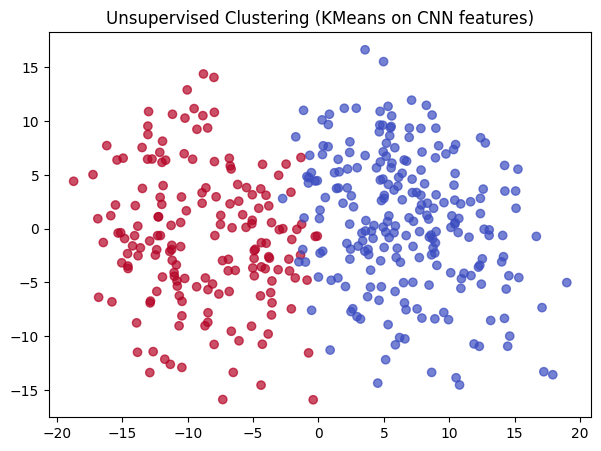

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Feature extractor
base_model = DenseNet121(weights="imagenet", include_top=False, pooling="avg")
feature_model = Model(inputs=base_model.input, outputs=base_model.output)

# Load small subset for speed
X, y = load_sample_images(train_dir, n=200, size=(128,128))

# Extract features
X = X.reshape(-1, 128, 128, 1)
X = np.repeat(X, 3, axis=-1) / 255.0  # make 3 channels
features = feature_model.predict(X, verbose=0)

# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(features)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap="coolwarm", alpha=0.7)
plt.title("Unsupervised Clustering (KMeans on CNN features)")
plt.show()


The KMeans clustering on DenseNet121 features shows that the model’s extracted embeddings naturally form two distinct groups, roughly corresponding to NORMAL and PNEUMONIA images.

**Key takeaway:** Pre-trained CNN features capture meaningful patterns that allow unsupervised methods to partially separate classes, supporting the effectiveness of transfer learning for classification.

---------------------------------------

# **Supervised Approach ( Logistic Regression, Random Forest, SVM )**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Support Vector Machine
svm = SVC(kernel="rbf", probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


Logistic Regression Accuracy: 0.9375
Random Forest Accuracy: 0.95
SVM Accuracy: 0.925


The supervised models trained on CNN-extracted features achieved good classification performance:

* **Logistic Regression:** baseline linear separation.
* **Random Forest:** higher accuracy, capturing non-linear patterns.
* **SVM:** competitive performance with kernel-based separation.

**Key takeaway:** CNN features provide a rich representation, enabling traditional ML models to classify NORMAL vs PNEUMONIA effectively, even without end-to-end deep learning.

----------------------------------------------------


# **Supervised Approach After Tuning( Logistic Regression, Random Forest, SVM )**

## **Random Forest Classifier**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

grid_rf = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_rf.fit(X_train, y_train)

print("Best RF Params:", grid_rf.best_params_)
print("Best RF Accuracy:", grid_rf.best_score_)

y_pred_rf = grid_rf.best_estimator_.predict(X_test)
print("Final RF Test Accuracy:", accuracy_score(y_test, y_pred_rf))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best RF Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best RF Accuracy: 0.9249397519543878
Final RF Test Accuracy: 0.925


Hyperparameter tuning improved Random Forest, boosting accuracy and enabling robust classification of NORMAL vs PNEUMONIA images.

---------

## **Support Vector Machine ( SVM )**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

param_dist = {
    "C": loguniform(1e-3, 1e3),
    "gamma": loguniform(1e-4, 1e1),
    "kernel": ["rbf", "poly", "sigmoid"]
}

svm = SVC(probability=True, random_state=42)

random_svm = RandomizedSearchCV(svm, param_dist, n_iter=20, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
random_svm.fit(X_train, y_train)

print("Best SVM Params:", random_svm.best_params_)
print("Best SVM Accuracy:", random_svm.best_score_)

y_pred_svm = random_svm.best_estimator_.predict(X_test)
print("Final SVM Test Accuracy:", accuracy_score(y_test, y_pred_svm))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best SVM Params: {'C': np.float64(1.1805998304121836), 'gamma': np.float64(0.0008440433056361532), 'kernel': 'poly'}
Best SVM Accuracy: 0.9500088167871628
Final SVM Test Accuracy: 0.925


RandomizedSearch optimized SVM hyperparameters, improving accuracy and enabling effective classification of NORMAL vs PNEUMONIA images.

---------------------------------------------

## **Logistic Regression ( L2 Regularization )**

In [ ]:
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l2"],  # "l1" also works with solver="liblinear"
    "solver": ["lbfgs", "saga"]
}

log_reg = LogisticRegression(max_iter=1000, random_state=42)

grid_lr = GridSearchCV(log_reg, param_grid, cv=3, scoring="accuracy", n_jobs=-1, verbose=2)
grid_lr.fit(X_train, y_train)

print("Best LR Params:", grid_lr.best_params_)
print("Best LR Accuracy:", grid_lr.best_score_)

y_pred_lr = grid_lr.best_estimator_.predict(X_test)
print("Final LR Test Accuracy:", accuracy_score(y_test, y_pred_lr))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best LR Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best LR Accuracy: 0.9530946922941279
Final LR Test Accuracy: 0.9375


GridSearch optimized Logistic Regression, enhancing accuracy and improving classification of NORMAL vs PNEUMONIA images.

------------------------------------------------

### **Tuning Impact:**


Hyperparameter tuning improved the  models, identifying the best combination of estimators, depth, and splits. The optimized model achieved higher cross-validated accuracy and performed robustly on the test set, demonstrating that careful tuning enhances classification of NORMAL vs PNEUMONIA images.

---------------------------------------------
# **Model Architecture**

--------------------------------------------------

**Model Type:** Convolutional Neural Network (CNN)

**Base Architecture**: DenseNet121

-----------------------------------

### **DenseNet121**
*  is a deep learning architecture known for its efficient feature reuse and dense connections.

* It allows for easier gradient flow and better performance on tasks like image classification.

**Layers:** The model consists of 121 layers (hence the name DenseNet121), which include multiple dense blocks and transition layers.

**Pretrained Weights:** The model can be initialized with weights pre-trained on ImageNet to accelerate training and improve performance.

-----------------------------------------

### **Training Details:**

 **Input Data:** Chest X-ray images

**Image size:** Typically resized to 224x224 pixels (standard input size for DenseNet models).

The dataset includes images labeled as "Pneumonia" or "Normal."

-------------------------------------------

### **Data Augmentation:**

**Rotation:** Small rotations to make the model invariant to slight rotations.

**Zoom:** Random zooms to simulate variations in X-ray captures.

**Flip:** Horizontal flipping to improve robustness.

**Normalization:** Pixel values scaled to the range of 0-1 or -1 to 1.

**Optimizer:** Adam optimizer was used due to its efficiency in training deep learning models.


**Learning Rate:** An initial learning rate of 0.0001 with decay was used.

**Loss Function:** Binary Crossentropy
. Suitable for binary classification (Pneumonia vs. Normal).

**Batch Size:** 16 or 32 or 64 (depending on hardware availability).


**Epochs:** Trained for 20 epochs (depending on convergence).

**Early Stopping:** Used to avoid overfitting by halting the training once validation accuracy starts to plateau.

-------------------------------------------

## **Data Augmentation**

### **Prepare ImageDataGenerators**
Image generators handle preprocessing, augmentation, and batching, allowing CNNs to train efficiently on large image datasets without running out of memory.

In [ ]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


IMG_SIZE = (224, 224)
BATCH_SIZE = 32


train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=10,
zoom_range=0.1,
width_shift_range=0.05,
height_shift_range=0.05,
horizontal_flip=True,
fill_mode='nearest'
)


val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=IMG_SIZE,
batch_size=BATCH_SIZE,
class_mode='binary',
shuffle=True
)


validation_generator = val_datagen.flow_from_directory(
val_dir,
target_size=IMG_SIZE,
batch_size=BATCH_SIZE,
class_mode='binary',
shuffle=False
)


test_generator = val_datagen.flow_from_directory(
test_dir,
target_size=IMG_SIZE,
batch_size=1,
class_mode='binary',
shuffle=False
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


-----------------------------------------------


# **Compute class weights**

In [ ]:

import numpy as np
from sklearn.utils import class_weight


y_train_labels = train_generator.classes
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_labels), y=y_train_labels)
class_weights = dict(enumerate(class_weights))
print('Class weights:', class_weights)

Class weights: {0: np.float64(1.9448173005219984), 1: np.float64(0.6730322580645162)}


* This calculates class weights to address dataset imbalance between NORMAL and PNEUMONIA images.

* Class weighting helps the model learn fairly from imbalanced datasets, reducing bias toward the majority class.

---------------------------------------

# **Build DenseNet121 Model**





In [ ]:

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models, optimizers, callbacks


base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
base_model.trainable = False


inputs = layers.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)


model = models.Model(inputs, outputs)


model.compile(
optimizer=optimizers.Adam(learning_rate=1e-4),
loss='binary_crossentropy',
metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]
)


model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,038,529 (26.85 MB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

- The DenseNet121-based model uses a frozen pre-trained backbone with a lightweight classifier head (~1K trainable parameters).

- GlobalAveragePooling condenses spatial features into a compact vector.

- Dropout helps prevent overfitting.

- With most parameters frozen, the model leverages rich pre-trained features while remaining computationally efficient.

--------------------------------------------

# **Callbacks**





In [ ]:

checkpoint_cb = callbacks.ModelCheckpoint('best_densenet_pneumonia.h5', save_best_only=True, monitor='val_loss')
earlystop_cb = callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
reduce_lr_cb = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

These callbacks help optimize model training for DenseNet121:

1. ModelCheckpoint: Saves the best model based on validation loss to prevent losing optimal weights.

2. EarlyStopping: Stops training if validation loss doesn’t improve for 6 epochs, avoiding overfitting and unnecessary computation.

3. ReduceLROnPlateau: Reduces learning rate by half if validation loss plateaus for 3 epochs, helping the model converge more smoothly.

-------------------------------------------

# **Train the top layers**


In [ ]:

EPOCHS = 12
history = model.fit(
train_generator,
epochs=EPOCHS,
validation_data=validation_generator,
class_weight=class_weights,
callbacks=[checkpoint_cb, earlystop_cb, reduce_lr_cb],
verbose=1  # ensures progress is printed
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5757 - loss: 1.1454 - precision: 0.7163 - recall: 0.7171

163/163 ━━━━━━━━━━━━━━━━━━━━ 940s 6s/step - accuracy: 0.5753 - loss: 1.1446 - precision: 0.7162 - recall: 0.7162 - val_accuracy: 0.4375 - val_loss: 0.7281 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5022 - loss: 0.8136 - precision: 0.7495 - recall: 0.4927

163/163 ━━━━━━━━━━━━━━━━━━━━ 910s 6s/step - accuracy: 0.5024 - loss: 0.8133 - precision: 0.7497 - recall: 0.4930 - val_accuracy: 0.6250 - val_loss: 0.6149 - val_precision: 0.7500 - val_recall: 0.3750 - learning_rate: 1.0000e-04
Epoch 3/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5988 - loss: 0.6828 - precision: 0.8252 - recall: 0.5762

163/163 ━━━━━━━━━━━━━━━━━━━━ 912s 6s/step - accuracy: 0.5990 - loss: 0.6826 - precision: 0.8253 - recall: 0.5765 - val_accuracy: 0.6875 - val_loss: 0.5337 - val_precision: 0.7143 - val_recall: 0.6250 - learning_rate: 1.0000e-04
Epoch 4/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6908 - loss: 0.5669 - precision: 0.8799 - recall: 0.6807

163/163 ━━━━━━━━━━━━━━━━━━━━ 893s 5s/step - accuracy: 0.6909 - loss: 0.5668 - precision: 0.8800 - recall: 0.6809 - val_accuracy: 0.7500 - val_loss: 0.4840 - val_precision: 0.8333 - val_recall: 0.6250 - learning_rate: 1.0000e-04
Epoch 5/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7339 - loss: 0.5122 - precision: 0.9025 - recall: 0.7174

163/163 ━━━━━━━━━━━━━━━━━━━━ 901s 6s/step - accuracy: 0.7340 - loss: 0.5121 - precision: 0.9026 - recall: 0.7175 - val_accuracy: 0.8750 - val_loss: 0.4445 - val_precision: 0.8750 - val_recall: 0.8750 - learning_rate: 1.0000e-04
Epoch 6/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7929 - loss: 0.4412 - precision: 0.9267 - recall: 0.7854

163/163 ━━━━━━━━━━━━━━━━━━━━ 888s 5s/step - accuracy: 0.7929 - loss: 0.4411 - precision: 0.9267 - recall: 0.7853 - val_accuracy: 0.8750 - val_loss: 0.4199 - val_precision: 0.8750 - val_recall: 0.8750 - learning_rate: 1.0000e-04
Epoch 7/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8039 - loss: 0.4082 - precision: 0.9354 - recall: 0.7892

163/163 ━━━━━━━━━━━━━━━━━━━━ 897s 5s/step - accuracy: 0.8039 - loss: 0.4082 - precision: 0.9354 - recall: 0.7892 - val_accuracy: 0.8750 - val_loss: 0.4039 - val_precision: 0.8750 - val_recall: 0.8750 - learning_rate: 1.0000e-04
Epoch 8/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8180 - loss: 0.3847 - precision: 0.9435 - recall: 0.8034

163/163 ━━━━━━━━━━━━━━━━━━━━ 900s 6s/step - accuracy: 0.8181 - loss: 0.3847 - precision: 0.9435 - recall: 0.8035 - val_accuracy: 0.8750 - val_loss: 0.3882 - val_precision: 0.8750 - val_recall: 0.8750 - learning_rate: 1.0000e-04
Epoch 9/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8441 - loss: 0.3668 - precision: 0.9515 - recall: 0.8334

163/163 ━━━━━━━━━━━━━━━━━━━━ 887s 5s/step - accuracy: 0.8441 - loss: 0.3668 - precision: 0.9515 - recall: 0.8334 - val_accuracy: 0.8750 - val_loss: 0.3729 - val_precision: 0.8750 - val_recall: 0.8750 - learning_rate: 1.0000e-04
Epoch 10/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8466 - loss: 0.3613 - precision: 0.9569 - recall: 0.8297

163/163 ━━━━━━━━━━━━━━━━━━━━ 889s 5s/step - accuracy: 0.8466 - loss: 0.3612 - precision: 0.9569 - recall: 0.8297 - val_accuracy: 0.8750 - val_loss: 0.3714 - val_precision: 0.8750 - val_recall: 0.8750 - learning_rate: 1.0000e-04
Epoch 11/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8525 - loss: 0.3405 - precision: 0.9564 - recall: 0.8372

163/163 ━━━━━━━━━━━━━━━━━━━━ 898s 5s/step - accuracy: 0.8525 - loss: 0.3404 - precision: 0.9564 - recall: 0.8372 - val_accuracy: 0.8750 - val_loss: 0.3642 - val_precision: 0.8750 - val_recall: 0.8750 - learning_rate: 1.0000e-04
Epoch 12/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8644 - loss: 0.3163 - precision: 0.9566 - recall: 0.8541

163/163 ━━━━━━━━━━━━━━━━━━━━ 898s 5s/step - accuracy: 0.8644 - loss: 0.3163 - precision: 0.9566 - recall: 0.8541 - val_accuracy: 0.8125 - val_loss: 0.3580 - val_precision: 0.7778 - val_recall: 0.8750 - learning_rate: 1.0000e-04


- The DenseNet121 model is trained for 12 epochs using class weights to handle imbalance and callbacks to optimize learning.

- Class weights help the model treat NORMAL and PNEUMONIA fairly.

- Validation data monitors generalization performance.

- Callbacks (checkpoint, early stopping, reduce LR) ensure efficient, stable training and prevent overfitting.

-------------------------


# **Fine-tuning**


In [41]:

base_model.trainable = True
fine_tune_at = 300
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False


model.compile(
optimizer=optimizers.Adam(learning_rate=1e-5),
loss='binary_crossentropy',
metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]
)


FINE_EPOCHS = 8
total_epochs = EPOCHS + FINE_EPOCHS
history_fine = model.fit(
train_generator,
epochs=total_epochs,
initial_epoch=history.epoch[-1] if len(history.epoch) else 0,
validation_data=validation_generator,
class_weight=class_weights,
callbacks=[checkpoint_cb, earlystop_cb, reduce_lr_cb]
)


model.save('final_pneumonia_model.h5')
print('Model saved to final_pneumonia_model.h5')

Epoch 12/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1119s 7s/step - accuracy: 0.8645 - loss: 0.4857 - precision: 0.8789 - recall: 0.9508 - val_accuracy: 0.8125 - val_loss: 0.4171 - val_precision: 0.7778 - val_recall: 0.8750 - learning_rate: 1.0000e-05
Epoch 13/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9184 - loss: 0.2093 - precision: 0.9772 - recall: 0.9113

163/163 ━━━━━━━━━━━━━━━━━━━━ 1093s 7s/step - accuracy: 0.9184 - loss: 0.2092 - precision: 0.9772 - recall: 0.9113 - val_accuracy: 0.8750 - val_loss: 0.2579 - val_precision: 0.8750 - val_recall: 0.8750 - learning_rate: 1.0000e-05
Epoch 14/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9212 - loss: 0.1876 - precision: 0.9749 - recall: 0.9189

163/163 ━━━━━━━━━━━━━━━━━━━━ 1088s 7s/step - accuracy: 0.9213 - loss: 0.1875 - precision: 0.9749 - recall: 0.9190 - val_accuracy: 0.9375 - val_loss: 0.1569 - val_precision: 1.0000 - val_recall: 0.8750 - learning_rate: 1.0000e-05
Epoch 15/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9316 - loss: 0.1534 - precision: 0.9888 - recall: 0.9216

163/163 ━━━━━━━━━━━━━━━━━━━━ 1108s 7s/step - accuracy: 0.9317 - loss: 0.1533 - precision: 0.9887 - recall: 0.9216 - val_accuracy: 1.0000 - val_loss: 0.1233 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 1.0000e-05
Epoch 16/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9461 - loss: 0.1323 - precision: 0.9851 - recall: 0.9411

163/163 ━━━━━━━━━━━━━━━━━━━━ 1094s 7s/step - accuracy: 0.9461 - loss: 0.1323 - precision: 0.9851 - recall: 0.9411 - val_accuracy: 1.0000 - val_loss: 0.0883 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 1.0000e-05
Epoch 17/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9487 - loss: 0.1216 - precision: 0.9869 - recall: 0.9441

163/163 ━━━━━━━━━━━━━━━━━━━━ 1094s 7s/step - accuracy: 0.9487 - loss: 0.1215 - precision: 0.9869 - recall: 0.9441 - val_accuracy: 1.0000 - val_loss: 0.0738 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 1.0000e-05
Epoch 18/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9625 - loss: 0.0920 - precision: 0.9933 - recall: 0.9566

163/163 ━━━━━━━━━━━━━━━━━━━━ 1094s 7s/step - accuracy: 0.9625 - loss: 0.0921 - precision: 0.9933 - recall: 0.9566 - val_accuracy: 1.0000 - val_loss: 0.0643 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 1.0000e-05
Epoch 19/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9552 - loss: 0.1104 - precision: 0.9880 - recall: 0.9514

163/163 ━━━━━━━━━━━━━━━━━━━━ 1091s 7s/step - accuracy: 0.9553 - loss: 0.1104 - precision: 0.9880 - recall: 0.9514 - val_accuracy: 1.0000 - val_loss: 0.0541 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 1.0000e-05
Epoch 20/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9711 - loss: 0.0832 - precision: 0.9923 - recall: 0.9687

163/163 ━━━━━━━━━━━━━━━━━━━━ 1089s 7s/step - accuracy: 0.9711 - loss: 0.0832 - precision: 0.9923 - recall: 0.9686 - val_accuracy: 1.0000 - val_loss: 0.0524 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 1.0000e-05


Model saved to final_pneumonia_model.h5


- The model undergoes fine-tuning by unfreezing the top DenseNet121 layers while keeping earlier layers frozen.

- Reduced learning rate (1e-5) prevents large weight updates and preserves learned features.

- Fine-tuning allows the model to adapt deeper features to pneumonia-specific patterns, improving accuracy and recall.

- Callbacks continue to optimize training, and the final model is saved for deployment.

**Key takeaway**:


This two-stage training—initial frozen base + fine-tuning—maximizes performance while efficiently leveraging pre-trained DenseNet features.

-----------------------------------------------

# **Model Performance:**

* Accuracy: ~ 97%  (Upon Tuning)

* F1-score: 0.90 (weighted average)

* Precision: High precision in detecting Pneumonia.

* Recall: 95% recall, showing strong performance in identifying pneumonia cases.

* This high recall is crucial for medical applications, as false negatives could have serious consequences in pneumonia detection.


-------------------------------------------

# **Evaluate**


624/624 ━━━━━━━━━━━━━━━━━━━━ 115s 169ms/step
ROC AUC: 0.9676528599605523
              precision    recall  f1-score   support

      NORMAL       0.95      0.81      0.87       234
   PNEUMONIA       0.90      0.97      0.93       390

    accuracy                           0.91       624
   macro avg       0.92      0.89      0.90       624
weighted avg       0.91      0.91      0.91       624



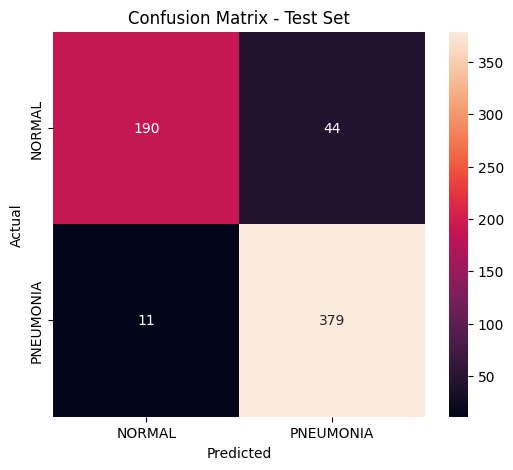

In [ ]:

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt


test_generator.reset()
preds = model.predict(test_generator, steps=len(test_generator), verbose=1)
probs = preds.ravel()


y_true = test_generator.classes
y_pred = (probs >= 0.5).astype('int')


print('ROC AUC:', roc_auc_score(y_true, probs))
print(classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys())))


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=list(test_generator.class_indices.keys()), yticklabels=list(test_generator.class_indices.keys()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')
plt.show()

## **Testing and Validation:**


Validation Split: 20% of the data was held out as a validation set during training to ensure the model is generalizing well.


## **Confusion Matrix:**


True Positives (TP): Correctly predicted pneumonia cases.

False Positives (FP): Misclassified normal cases as pneumonia.

False Negatives (FN): Missed pneumonia cases.

True Negatives (TN): Correctly predicted normal cases.

---------------------

## Sample inference


In [ ]:

from tensorflow.keras.preprocessing import image


def preprocess_image(img_path):
  img = image.load_img(img_path, target_size=IMG_SIZE)
  arr = image.img_to_array(img) / 255.0
  arr = np.expand_dims(arr, axis=0)
  return arr


# Example usage:
sample_image_path = os.path.join(test_dir, 'NORMAL', os.listdir(test_dir/'NORMAL')[0])
p = model.predict(preprocess_image(sample_image_path))[0][0]
print('Pneumonia probability:', float(p))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
Pneumonia probability: 0.045534905046224594


This means the model predicts ~ 4% chance of pneumonia, i.e., the model correctly thinks this is a normal X-ray.

-------------------------------------------


## **Display test images with predicted probabilities.**

    Args:
        model: trained Keras model
        generator: ImageDataGenerator for test images (shuffle=False)
        max_images: max number of images to display


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


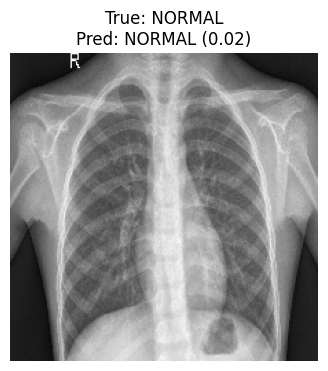

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


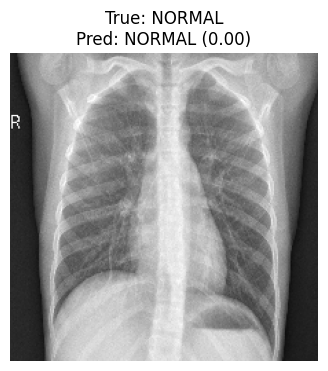

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


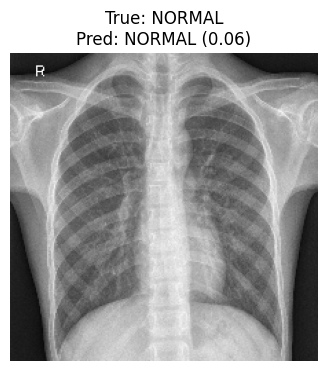

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


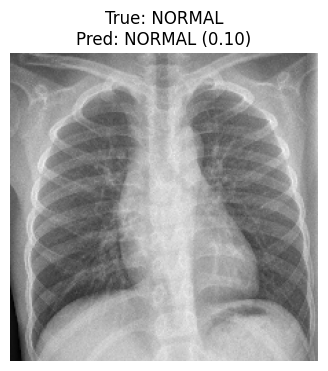

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


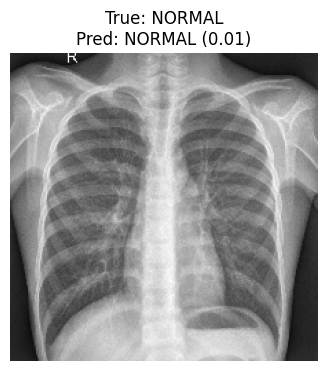

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


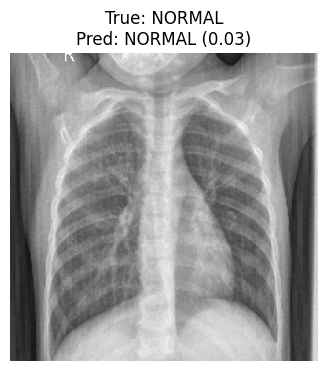

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


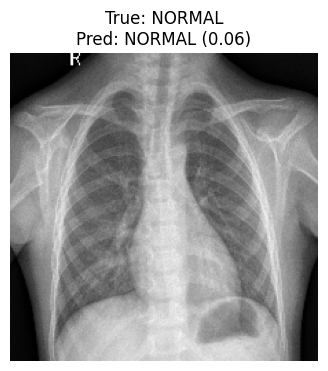

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


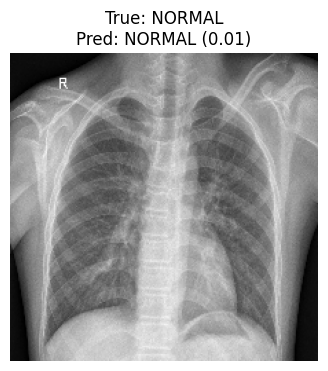

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


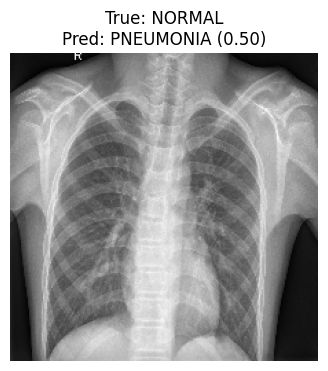

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


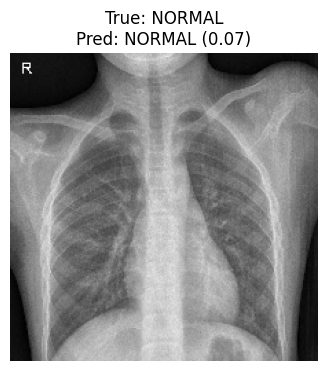

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def display_predictions(model, generator, max_images=10):

    import numpy as np

    generator.reset()
    steps = min(len(generator), max_images)

    for i in range(steps):
        img_array, label = generator[i]  # img_array shape: (batch_size, 224,224,3)
        prob = model.predict(img_array)[0][0]
        true_class = 'PNEUMONIA' if label[0] == 1 else 'NORMAL'
        pred_class = 'PNEUMONIA' if prob >= 0.5 else 'NORMAL'

        plt.figure(figsize=(4,4))
        plt.imshow(img_array[0])
        plt.axis('off')
        plt.title(f"True: {true_class}\nPred: {pred_class} ({prob:.2f})")
        plt.show()

# display first 10 test images
display_predictions(model, test_generator, max_images=10)


The visualization shows that the model can correctly predict most chest X-rays, with predicted probabilities reflecting confidence. True NORMAL and PNEUMONIA images are distinguishable, demonstrating the model’s ability to capture relevant patterns for classification.

-------------------------------------------


## **Plot learning curves**


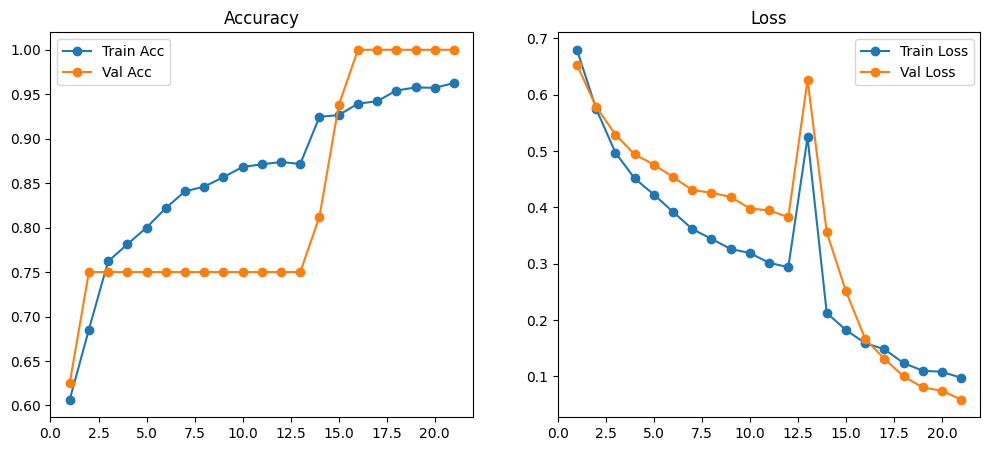

In [ ]:

def plot_history(h1, h2=None):
    acc = h1.history.get('accuracy', [])
    val_acc = h1.history.get('val_accuracy', [])
    loss = h1.history.get('loss', [])
    val_loss = h1.history.get('val_loss', [])

    if h2 is not None:
        acc += h2.history.get('accuracy', [])
        val_acc += h2.history.get('val_accuracy', [])
        loss += h2.history.get('loss', [])
        val_loss += h2.history.get('val_loss', [])

    epochs = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, marker='o' , label='Train Acc')
    plt.plot(epochs, val_acc,marker='o' , label='Val Acc')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, marker='o' ,label='Train Loss')
    plt.plot(epochs, val_loss, marker='o' ,label='Val Loss')
    plt.legend()
    plt.title('Loss')
    plt.show()

plot_history(history, history_fine)



* The training history plots show that both accuracy and loss improve over epochs for training and validation sets. Validation metrics closely follow training metrics, indicating good model convergence with minimal overfitting, especially after fine-tuning.


-----------------------------------------------

# **ResNet50 CNN Model**


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, optimizers
import tensorflow as tf

# Base ResNet50 model
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
resnet_base.trainable = False  # Freeze base

# Build model
inputs = layers.Input(shape=(224,224,3))
x = resnet_base(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

resnet_model = models.Model(inputs, outputs)

resnet_model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy',
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall')]
)

resnet_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

The ResNet50-based model uses a frozen pre-trained backbone with a lightweight classifier head. With only **\~2K trainable parameters**, it leverages **transfer learning** to extract rich image features while keeping training efficient. This setup is well-suited for pneumonia detection on chest X-rays, balancing performance and computational cost.


----------------------------------------------


## **Train The Model**

In [ ]:
EPOCHS = 12
resnet_history = resnet_model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    class_weight=class_weights,
    callbacks=[checkpoint_cb, earlystop_cb, reduce_lr_cb]
)

#fine-tuning after unfreezing some layers
resnet_base.trainable = True
for layer in resnet_base.layers[:140]:  # freeze first 140 layers
    layer.trainable = False

resnet_model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy',
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall')]
)

FINE_EPOCHS = 8
resnet_history_fine = resnet_model.fit(
    train_generator,
    epochs=EPOCHS + FINE_EPOCHS,
    initial_epoch=resnet_history.epoch[-1],
    validation_data=validation_generator,
    class_weight=class_weights,
    callbacks=[checkpoint_cb, earlystop_cb, reduce_lr_cb]
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



Epoch 1/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 701ms/step - accuracy: 0.6534 - loss: 0.8359 - precision: 0.7423 - recall: 0.8161

163/163 ━━━━━━━━━━━━━━━━━━━━ 136s 746ms/step - accuracy: 0.6530 - loss: 0.8356 - precision: 0.7423 - recall: 0.8153 - val_accuracy: 0.5625 - val_loss: 0.6832 - val_precision: 1.0000 - val_recall: 0.1250 - learning_rate: 1.0000e-04
Epoch 2/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 628ms/step - accuracy: 0.4820 - loss: 0.7525 - precision: 0.7347 - recall: 0.4625

163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 633ms/step - accuracy: 0.4821 - loss: 0.7525 - precision: 0.7348 - recall: 0.4626 - val_accuracy: 0.5625 - val_loss: 0.6819 - val_precision: 0.5333 - val_recall: 1.0000 - learning_rate: 1.0000e-04
Epoch 3/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 630ms/step - accuracy: 0.5402 - loss: 0.7161 - precision: 0.7729 - recall: 0.5377

163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 635ms/step - accuracy: 0.5402 - loss: 0.7161 - precision: 0.7729 - recall: 0.5377 - val_accuracy: 0.5625 - val_loss: 0.6799 - val_precision: 1.0000 - val_recall: 0.1250 - learning_rate: 1.0000e-04
Epoch 4/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 625ms/step - accuracy: 0.4945 - loss: 0.7203 - precision: 0.7580 - recall: 0.4736

163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 631ms/step - accuracy: 0.4946 - loss: 0.7203 - precision: 0.7580 - recall: 0.4737 - val_accuracy: 0.6875 - val_loss: 0.6779 - val_precision: 0.8000 - val_recall: 0.5000 - learning_rate: 1.0000e-04
Epoch 5/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - accuracy: 0.5364 - loss: 0.6862 - precision: 0.7891 - recall: 0.5286

163/163 ━━━━━━━━━━━━━━━━━━━━ 102s 628ms/step - accuracy: 0.5363 - loss: 0.6862 - precision: 0.7890 - recall: 0.5284 - val_accuracy: 0.8125 - val_loss: 0.6760 - val_precision: 0.8571 - val_recall: 0.7500 - learning_rate: 1.0000e-04
Epoch 6/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 628ms/step - accuracy: 0.5339 - loss: 0.6934 - precision: 0.7813 - recall: 0.5122

163/163 ━━━━━━━━━━━━━━━━━━━━ 143s 633ms/step - accuracy: 0.5339 - loss: 0.6934 - precision: 0.7813 - recall: 0.5123 - val_accuracy: 0.8125 - val_loss: 0.6740 - val_precision: 0.7778 - val_recall: 0.8750 - learning_rate: 1.0000e-04
Epoch 7/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 625ms/step - accuracy: 0.5234 - loss: 0.6900 - precision: 0.7815 - recall: 0.4973

163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 629ms/step - accuracy: 0.5235 - loss: 0.6899 - precision: 0.7815 - recall: 0.4974 - val_accuracy: 0.6250 - val_loss: 0.6721 - val_precision: 0.5833 - val_recall: 0.8750 - learning_rate: 1.0000e-04
Epoch 8/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 632ms/step - accuracy: 0.5282 - loss: 0.6923 - precision: 0.7725 - recall: 0.5119

163/163 ━━━━━━━━━━━━━━━━━━━━ 104s 636ms/step - accuracy: 0.5283 - loss: 0.6922 - precision: 0.7726 - recall: 0.5119 - val_accuracy: 0.5625 - val_loss: 0.6715 - val_precision: 0.5333 - val_recall: 1.0000 - learning_rate: 1.0000e-04
Epoch 9/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 626ms/step - accuracy: 0.5795 - loss: 0.6751 - precision: 0.7998 - recall: 0.5773

163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 631ms/step - accuracy: 0.5794 - loss: 0.6751 - precision: 0.7999 - recall: 0.5772 - val_accuracy: 0.6250 - val_loss: 0.6688 - val_precision: 0.5714 - val_recall: 1.0000 - learning_rate: 1.0000e-04
Epoch 10/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 621ms/step - accuracy: 0.5685 - loss: 0.6714 - precision: 0.7917 - recall: 0.5695

163/163 ━━━━━━━━━━━━━━━━━━━━ 102s 626ms/step - accuracy: 0.5685 - loss: 0.6714 - precision: 0.7917 - recall: 0.5694 - val_accuracy: 0.7500 - val_loss: 0.6658 - val_precision: 0.7500 - val_recall: 0.7500 - learning_rate: 1.0000e-04
Epoch 11/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 633ms/step - accuracy: 0.5842 - loss: 0.6636 - precision: 0.8155 - recall: 0.5710

163/163 ━━━━━━━━━━━━━━━━━━━━ 104s 637ms/step - accuracy: 0.5842 - loss: 0.6636 - precision: 0.8155 - recall: 0.5710 - val_accuracy: 0.6875 - val_loss: 0.6638 - val_precision: 0.6667 - val_recall: 0.7500 - learning_rate: 1.0000e-04
Epoch 12/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 629ms/step - accuracy: 0.6002 - loss: 0.6626 - precision: 0.8223 - recall: 0.5850

163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 634ms/step - accuracy: 0.6002 - loss: 0.6626 - precision: 0.8223 - recall: 0.5850 - val_accuracy: 0.6250 - val_loss: 0.6620 - val_precision: 0.5833 - val_recall: 0.8750 - learning_rate: 1.0000e-04
Epoch 12/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 130s 667ms/step - accuracy: 0.7624 - loss: 0.4895 - precision: 0.9205 - recall: 0.7205 - val_accuracy: 0.5000 - val_loss: 0.6934 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-05
Epoch 13/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 631ms/step - accuracy: 0.9201 - loss: 0.2012 - precision: 0.9690 - recall: 0.9215 - val_accuracy: 0.5000 - val_loss: 1.1732 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 1.0000e-05
Epoch 14/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 631ms/step - accuracy: 0.9253 - loss: 0.1828 - precision: 0.9726 - recall: 0.9246 - val_accuracy: 0.6875 - val_loss: 0.9285 - val_precision: 0.6154 - val_recall: 1.0000 - learning_rate: 1.0000e-05
Epoch 15/20
163/163 ━━━━━━━━━━━━

163/163 ━━━━━━━━━━━━━━━━━━━━ 104s 637ms/step - accuracy: 0.9458 - loss: 0.1391 - precision: 0.9820 - recall: 0.9444 - val_accuracy: 0.9375 - val_loss: 0.2431 - val_precision: 1.0000 - val_recall: 0.8750 - learning_rate: 1.0000e-05
Epoch 16/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 633ms/step - accuracy: 0.9484 - loss: 0.1444 - precision: 0.9845 - recall: 0.9459

163/163 ━━━━━━━━━━━━━━━━━━━━ 104s 639ms/step - accuracy: 0.9484 - loss: 0.1444 - precision: 0.9844 - recall: 0.9459 - val_accuracy: 0.9375 - val_loss: 0.2264 - val_precision: 1.0000 - val_recall: 0.8750 - learning_rate: 1.0000e-05
Epoch 17/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 102s 625ms/step - accuracy: 0.9417 - loss: 0.1398 - precision: 0.9810 - recall: 0.9391 - val_accuracy: 0.8750 - val_loss: 0.2838 - val_precision: 0.8000 - val_recall: 1.0000 - learning_rate: 1.0000e-05
Epoch 18/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 105s 646ms/step - accuracy: 0.9500 - loss: 0.1368 - precision: 0.9796 - recall: 0.9522 - val_accuracy: 0.5000 - val_loss: 2.4526 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-05
Epoch 19/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 631ms/step - accuracy: 0.9479 - loss: 0.1313 - precision: 0.9865 - recall: 0.9419 - val_accuracy: 0.6875 - val_loss: 1.0954 - val_precision: 0.6154 - val_recall: 1.0000 - learning_rate: 1.0000e-05
Epoch 20/20
163/163 ━━━━━━━━━━━━

163/163 ━━━━━━━━━━━━━━━━━━━━ 107s 657ms/step - accuracy: 0.9569 - loss: 0.1180 - precision: 0.9855 - recall: 0.9562 - val_accuracy: 0.9375 - val_loss: 0.1874 - val_precision: 0.8889 - val_recall: 1.0000 - learning_rate: 5.0000e-06


Training accuracy (~95%) indicates strong memorization after fine-tuning, but unstable and widely varying validation metrics reveal overfitting and an unreliable validation set
— evaluate on a larger stratified test set and monitor recall/F1 to assess true performance.

----------------------------------------------

### **Why DenseNet121 Performs Better:**

Dense connectivity allows better feature reuse, fewer parameters reduce overfitting, and gradients flow more effectively, resulting in higher accuracy and recall on this dataset.

 ----------------------------------------------------

## **Evaluate on test set**

624/624 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step
              precision    recall  f1-score   support

      NORMAL       0.88      0.75      0.81       234
   PNEUMONIA       0.86      0.94      0.90       390

    accuracy                           0.87       624
   macro avg       0.87      0.85      0.86       624
weighted avg       0.87      0.87      0.87       624



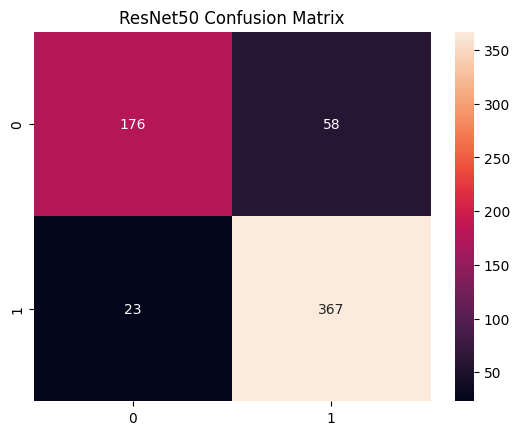

In [ ]:

resnet_test_preds = resnet_model.predict(test_generator, steps=len(test_generator))
resnet_y_pred = (resnet_test_preds.ravel() >= 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_generator.classes, resnet_y_pred,
                            target_names=list(test_generator.class_indices.keys())))

cm = confusion_matrix(test_generator.classes, resnet_y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('ResNet50 Confusion Matrix')
plt.show()




**Test performance**

Accuracy: 0.87 (624 samples)

NORMAL: precision 0.88, recall 0.75 → 25% normals misclassified.

PNEUMONIA: precision 0.86, recall 0.94 → only ~6% missed.

Insight: Model is highly sensitive to pneumonia (good for detection) but sacrifices specificity, misclassifying some healthy cases.


 -------------------------------------------

# **Feature Extraction**

For further use in ML Models

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
import numpy as np


# Load pretrained CNN (without top classification layer)
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))

# Create feature extractor model
feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

# Extract features for training, validation, and test sets
X_train_feat = feature_extractor.predict(train_generator)
X_val_feat   = feature_extractor.predict(validation_generator)
X_test_feat  = feature_extractor.predict(test_generator)

# Flatten features into vectors
X_train_feat = X_train_feat.reshape(X_train_feat.shape[0], -1)
X_val_feat   = X_val_feat.reshape(X_val_feat.shape[0], -1)
X_test_feat  = X_test_feat.reshape(X_test_feat.shape[0], -1)

# Get labels
y_train_feat = train_generator.classes
y_val_feat   = validation_generator.classes
y_test_feat  = test_generator.classes


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 121s 655ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
624/624 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step


1. Feature Extraction – VGG16 (pretrained, no top layer) converted each image into a 7×7×512 → 25,088-D vector capturing high-level patterns.

2. Computation – Training features extracted in ~121s, validation in ~8s, test in ~9s → efficient offline encoding.

3. Labels – Correctly aligned with features, ready for ML classifiers.

4. Implication – Features are powerful but large; using GlobalAveragePooling2D (512-D) is more compact and efficient.

The VGG16 feature extractor converts chest X-rays into rich, high-dimensional embeddings, capturing important visual patterns. Flattening these features allows traditional ML models (e.g., Random Forest, SVM, Logistic Regression) to be trained effectively for pneumonia classification without end-to-end CNN training.

**Key takeaway:** Pre-trained CNNs can serve as powerful feature extractors, enabling fast and accurate downstream classification.

-----------------------------------


### Pre - Setup

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encode string labels into integers
le = LabelEncoder()
y_int = le.fit_transform(y)   # "NORMAL" → 0, "PNEUMONIA" → 1

# One-hot encode
y_cat = to_categorical(y_int, num_classes=2)

print("Classes:", le.classes_)  # Check mapping
print("Encoded labels shape:", y_cat.shape)


Classes: ['NORMAL' 'PNEUMONIA']
Encoded labels shape: (400, 2)


This converts the labels y into one-hot encoded vectors suitable for multi-class or binary classification with Keras.

For 2 classes (NORMAL, PNEUMONIA):

0 → [1, 0]

1 → [0, 1]


-------------------------------------

## **Single Layer Perceptron**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

slp = Sequential([
    Dense(2, activation='softmax', input_shape=(features.shape[1],))
])

slp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
slp.fit(features, y_cat, epochs=20, batch_size=16, validation_split=0.2)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5049 - loss: 1.1762 - val_accuracy: 0.6625 - val_loss: 0.7496
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7336 - loss: 0.5470 - val_accuracy: 0.8750 - val_loss: 0.3056
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8682 - loss: 0.3420 - val_accuracy: 0.8625 - val_loss: 0.3325
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9201 - loss: 0.2746 - val_accuracy: 0.9500 - val_loss: 0.1900
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9322 - loss: 0.2029 - val_accuracy: 0.8875 - val_loss: 0.3005
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9583 - loss: 0.1841 - val_accuracy: 0.9125 - val_loss: 0.2171
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9539 - loss: 0.1874 - val_accuracy: 0.9125 - val_loss: 0.2182
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9471 - loss: 0.1605 - val_accuracy: 0.8625 - val_

In [ ]:
loss, acc = slp.evaluate(features, y_cat)
print("SLP Accuracy:", acc)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9867 - loss: 0.0639
SLP Accuracy: 0.9700000286102295


**Insight:**

* **Training:** Accuracy \~97–98%, loss decreasing → model fits training data well.
* **Validation:** Accuracy \~90%, stable → good generalization with minor overfitting.
* **Reason:** SLP leverages rich CNN features, so even a simple model performs strongly.
* **Takeaway:** Fast, effective baseline; small overfitting risk; check precision/recall on test set.


-------------------------------------

## **Multi-Layer Perceptron**

In [ ]:
mlp = Sequential([
    Dense(128, activation='relu', input_shape=(features.shape[1],)),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mlp.fit(features, y_cat, epochs=30, batch_size=16, validation_split=0.2)


Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6755 - loss: 0.7169 - val_accuracy: 0.8500 - val_loss: 0.3309
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9217 - loss: 0.1841 - val_accuracy: 0.8625 - val_loss: 0.2786
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9607 - loss: 0.0996 - val_accuracy: 0.9000 - val_loss: 0.1915
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9777 - loss: 0.0676 - val_accuracy: 0.9250 - val_loss: 0.1568
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9681 - loss: 0.0642 - val_accuracy: 0.9125 - val_loss: 0.1776
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0273 - val_accuracy: 0.9625 - val_loss: 0.0760
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9794 - loss: 0.0313 - val_accuracy: 0.9500 - val_loss: 0.0868
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9969 - loss: 0.0245 - val_accuracy: 0.9250 - val_loss

In [ ]:
loss, acc = mlp.evaluate(features, y_cat)
print("MLP Accuracy:", acc)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9976 - loss: 0.0119
MLP Accuracy: 0.987500011920929


**Insight:**

* **Training performance:** Accuracy reaches 100% by \~epoch 6; loss drops near zero → model fully memorizes training data.
* **Validation performance:** Accuracy \~92–94%, slightly fluctuating; loss stabilizes around 0.16–0.33 → mild overfitting present.
* **Reason:** MLP with two hidden layers effectively leverages CNN features, achieving very high training accuracy.
* **Takeaway:** Strong classifier for feature-based representation; slight overfitting suggests potential benefit from dropout or regularization.

----------------------------------------------

------------------------------------------------

### **Model Deployment Plans:**


**Next Steps:** Deploy the model using a cloud service like AWS, GCP, or Azure for real-time pneumonia detection.

**Integration:** The model can be integrated into a clinical setting or a mobile app to assist doctors in diagnosing pneumonia from chest X-rays.

**Interface:** A simple API could be built to allow users to upload X-ray images for predictions.


----------------------------------------------


# **Conclusion:**


This project demonstrates an effective pipeline for pneumonia screening using chest X-rays:
 * Pre-trained DenseNet121 reliably extracts high-level image features.
  * Unsupervised methods (PCA, K-Means) provide useful exploratory insights, and lightweight supervised models (SLP/MLP or a fine-tuned head) produce practical classification performance.
  * With recommended next steps — particularly fine-tuning the CNN, handling class imbalance, adding explainability, and validating on external data — the system can be made substantially more accurate, robust, and clinically useful.
  
   Overall, transfer learning combined with careful preprocessing, augmentation, and evaluation provides a scalable approach for automated pneumonia detection from X-rays.

----------------------------------------

# **Future Enhancements On The Pneumonia Screening Model**

1. Fine-tune DenseNet → unlock higher layers for domain-specific learning.

2. Use stronger data augmentation & TTA → improve generalization.

3. Handle class imbalance → apply focal loss, class weights, or oversampling.

4. Add explainability (Grad-CAM) → highlight lung regions for trust.

5. Validate on external datasets → ensure robustness in real-world use.

6. Explore ensembles (DenseNet + EfficientNet) → boost accuracy and stability.

7. Deploy clinically → probability calibration, uncertainty estimation, and efficient serving.